# EE5907 CA1 Part 3

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

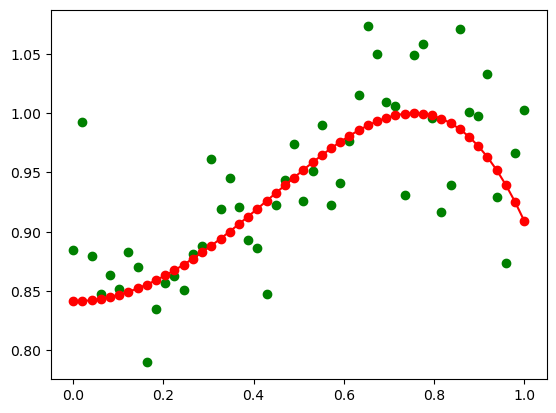

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# 1&2&3. data generating
sig = 0.05

x = np.linspace(0, 1, 50)
X = x.reshape(-1, 1)
N = x.shape[0] # No. input samples
# print (X.shape)
y = np.sin(x**2 + 1)
Y = y.reshape(y.shape[0],1)
yn = y + np.random.normal(0, sig, size=50) 
Yn = yn.reshape(yn.shape[0],1)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.show()


2. Compute $w$ based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of $w$.

In [3]:

def gaussian(x, mean, sigma):

    gau = np.exp(-((x - mean)**2)/(2*(sigma**2)))

    return gau
# gd = gaussian(X,1,1)
# print(gd)

def sigmoid(x, mu, sigma):

    h = 1 / (1 + np.exp((x - mu) / sigma))
    return h

def getmean(x, m):

    mu = np.zeros((m))
    gap = (max(x) - min(x))/ (m)

    for i in range(m):
        mu[i] = (i) * gap

    return mu
# mu = getmean(X,M)
# print(mu, mu.shape)

# Def. of basis func.
beta = 18
alpha = 0.5
M = 6

def full_Bayesian(data, m, a, mode, n = N):
    # mode is a boolean number indicating the selected basis function

    phimat = np.zeros((n, m))
    # print(phimat.shape, X.shape)
    mu = getmean(X, m)

    for row in range(n):
        for col in range(m):
            if col == 0:
                phimat[row, col] = 1
            else:
                if mode == 0:
                    phimat[row, col] = gaussian(X[row], mu[col], 0.2)
                else:
                    phimat[row, col] = sigmoid(X[row], mu[col], 0.2)
    # print(phimat)

    weight = beta * np.dot(np.dot(np.linalg.inv(beta * np.dot((phimat.T),phimat) \
                                                + a * np.eye(m)), (phimat.T)), data)
    
    svec = np.linalg.inv(beta * np.dot((phimat.T),phimat) + a * np.eye(m))
    mvec = beta *np.dot(np.dot(svec, (phimat.T)), data)
    # print(weight.shape, mvec.shape, svec.shape, np.linalg.inv(svec).shape)

    pred = np.dot(phimat, weight)
    return mvec, pred

weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)

print('the estimated values of weight is: \n ', weight)


the estimated values of weight is: 
  [[ 0.9035747 ]
 [-0.02943246]
 [-0.00967258]
 [-0.00744253]
 [ 0.07750086]
 [ 0.04256419]]


3. Experiment with your code by changing $\alpha$ and $\beta$. Discuss the meaning of them with respect to the curve fitting results

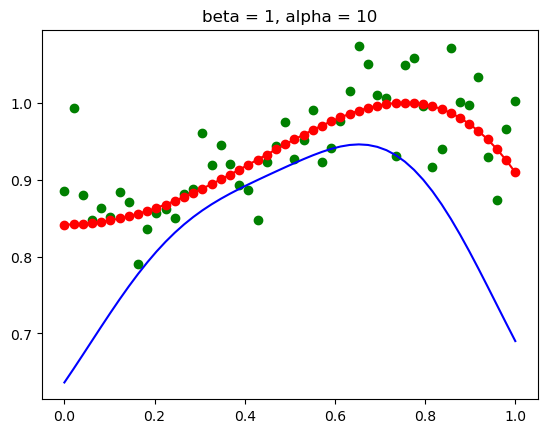

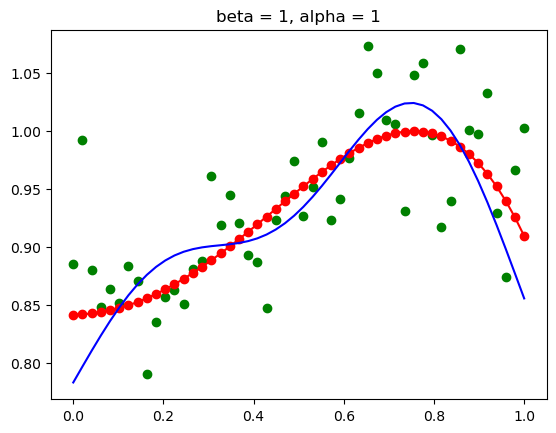

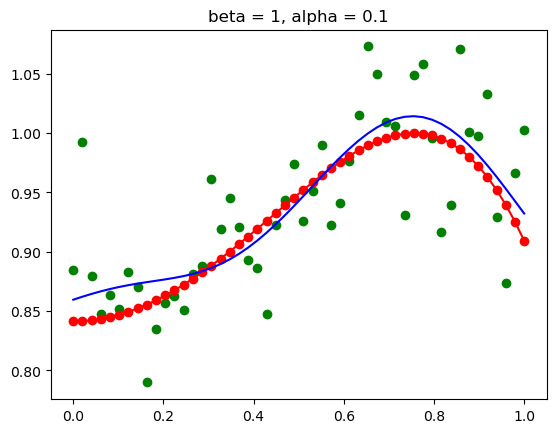

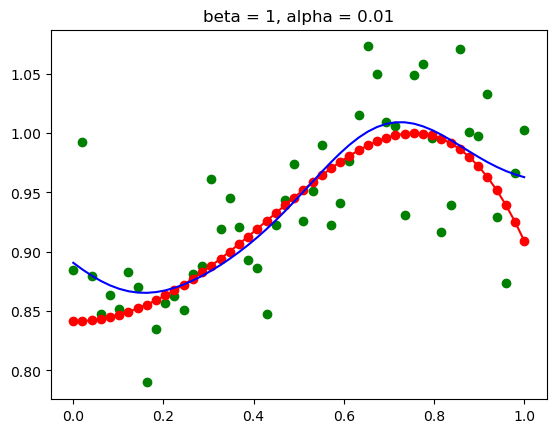

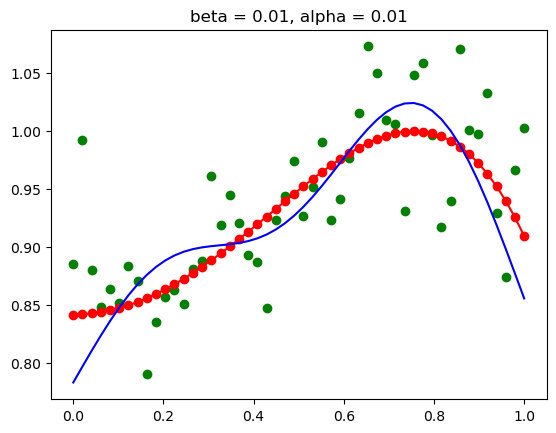

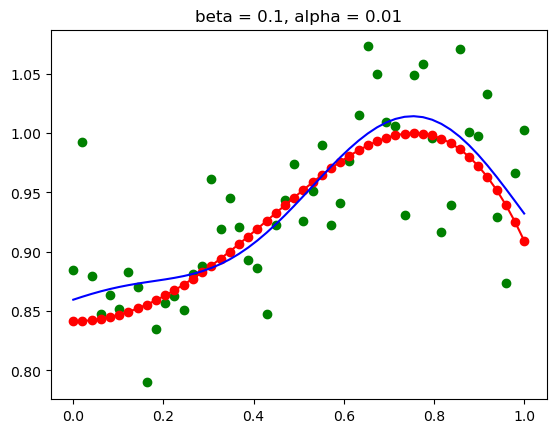

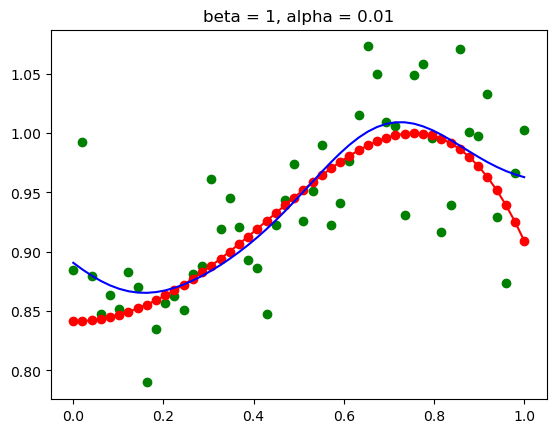

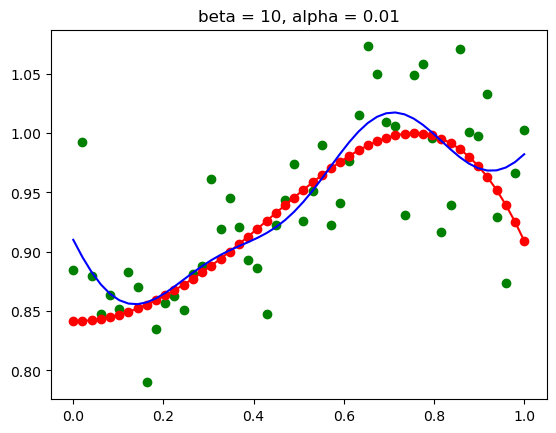

In [4]:

beta = 1
alpha = 10
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 1
alpha = 1
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 1
alpha = 0.1
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 1
alpha = 0.01
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 0.01
alpha = 0.01
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 0.1
alpha = 0.01
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 1
alpha = 0.01
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()

beta = 10
alpha = 0.01
weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()


$\alpha$ represents the variance of the prior $p(w)$ while $\beta$ represents the variance of likelihood $p(t|w)$. Empirically, a small $\alpha$ and a large $\beta$ may lead to overfitting, while the contary may cause underfitting.

4. Show your best fitting

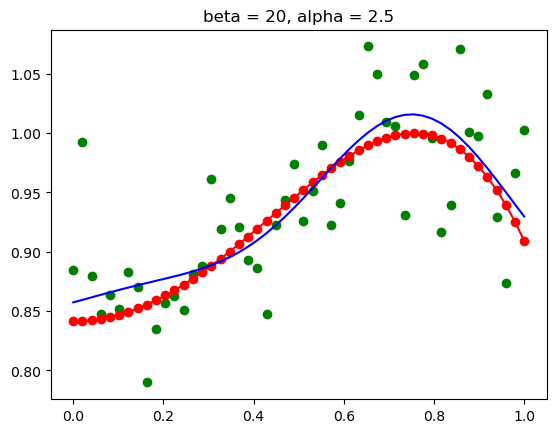

In [27]:

beta = 20
alpha = 2.5
M = 5

weight, y_pred = full_Bayesian(Yn, M, alpha, 0, N)
plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.plot(x, y_pred, color='b')
plt.title('beta = {}, alpha = {}'.format(beta, alpha))
plt.show()


5. Explain how useful p(w|t) for the training and testing stages

During training stage, $p(w|t)$ in full Bayesian methods quantifies parameter uncertainty and supports parameter tuning. In testing stage, it enables predictive uncertainty estimation, Bayesian model averaging, and online learning for robust predictions.

6. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

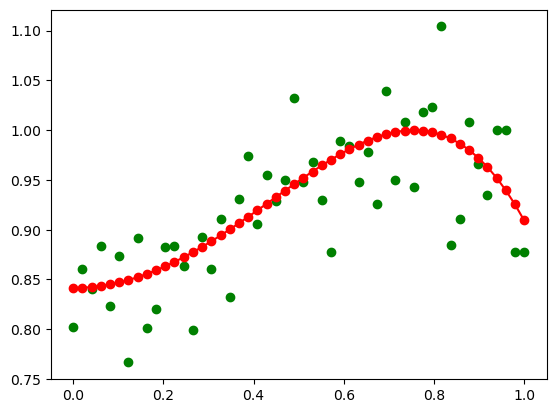

In [9]:

import numpy as np
import matplotlib.pyplot as plt

sig = 0.05

x = np.linspace(0, 1, 50)
X = x.reshape(-1, 1)
N = x.shape[0] # No. input samples
# print (X.shape)
y = np.sin(x**2 + 1)
Y = y.reshape(y.shape[0],1)
yn = y + np.random.normal(0, sig, size=50) 
Yn = yn.reshape(yn.shape[0],1)

plt.scatter(x, yn, c='green')
plt.scatter(x, y, c='red')
plt.plot(x, y, color='r')
plt.show()

7. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one

0 [22]


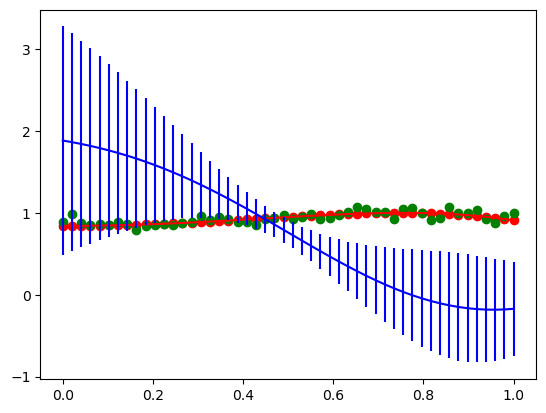

1 [22, 12]


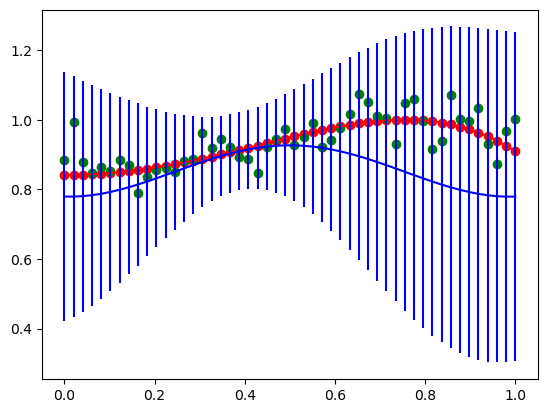

2 [22, 12, 5]


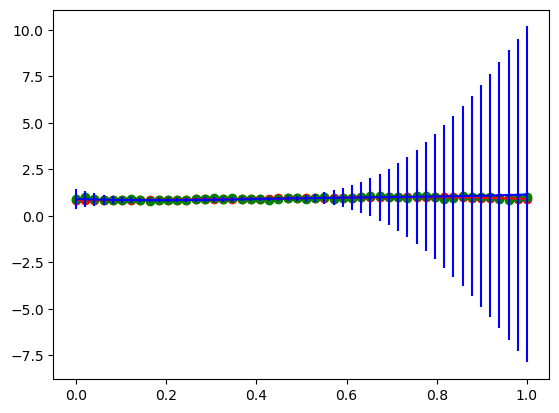

3 [22, 12, 5, 30]


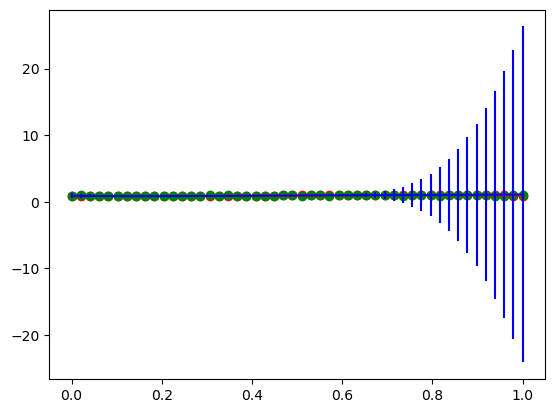

4 [22, 12, 5, 30, 36]


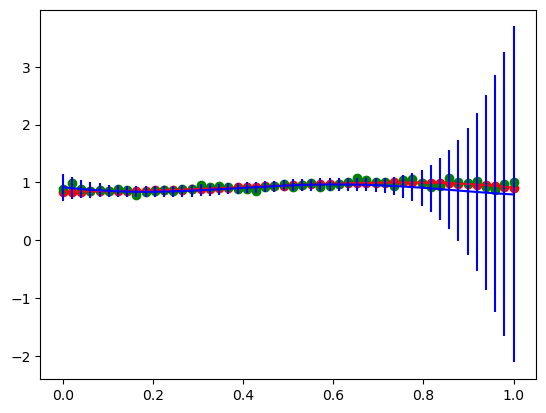

5 [22, 12, 5, 30, 36, 38]


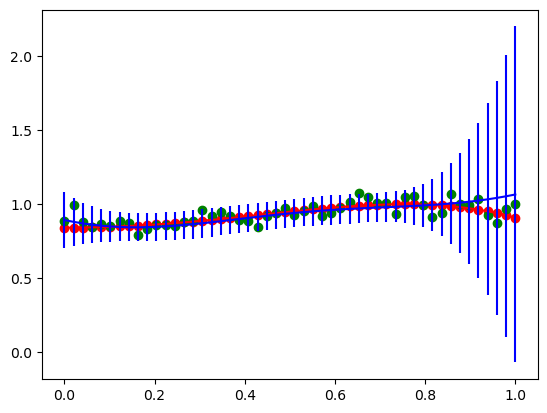

6 [22, 12, 5, 30, 36, 38, 14]


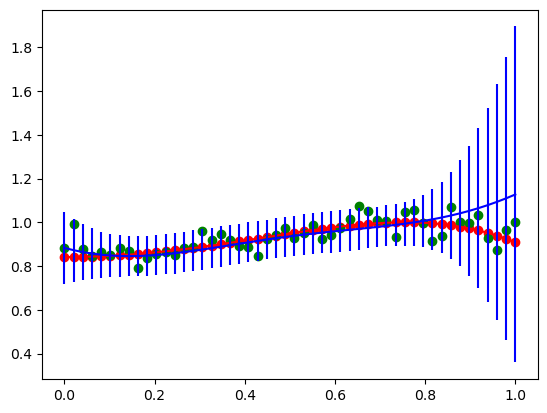

7 [22, 12, 5, 30, 36, 38, 14, 33]


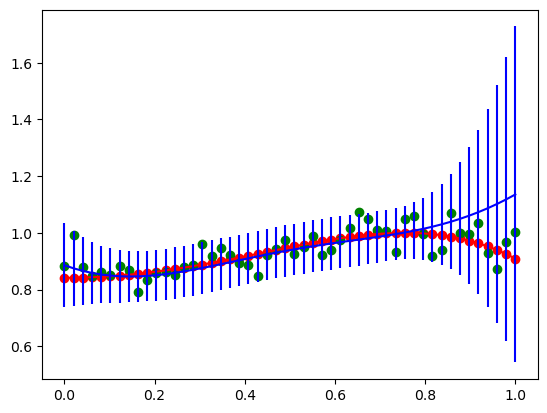

8 [22, 12, 5, 30, 36, 38, 14, 33, 24]


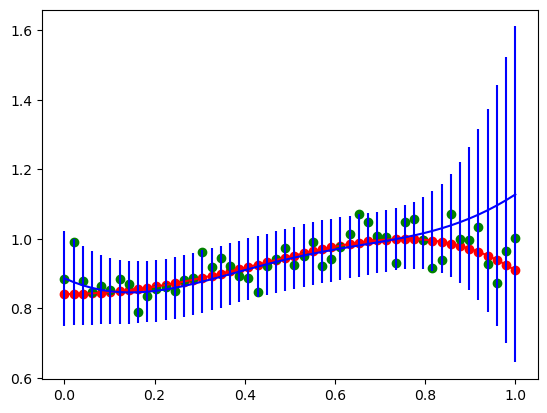

9 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11]


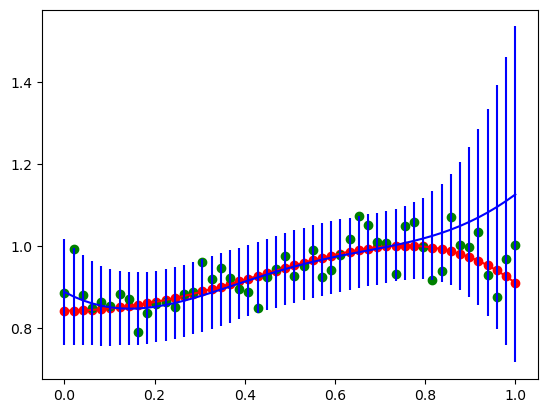

10 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0]


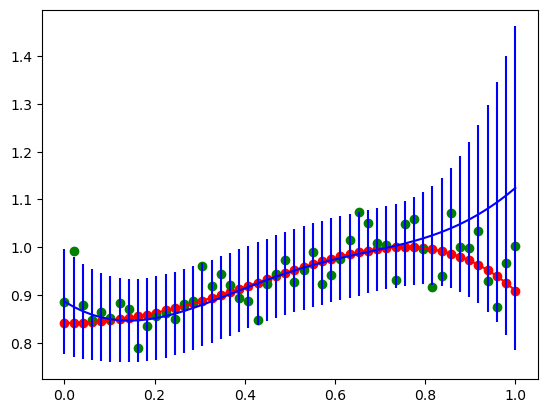

11 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25]


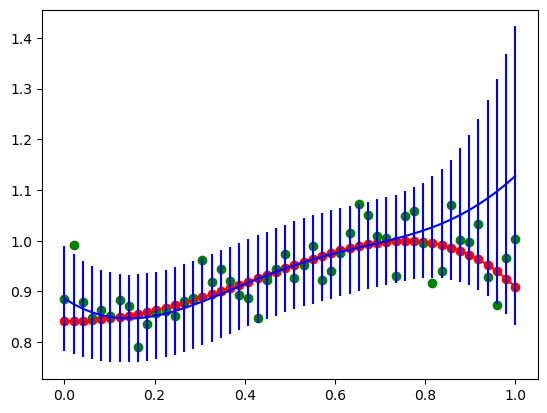

12 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3]


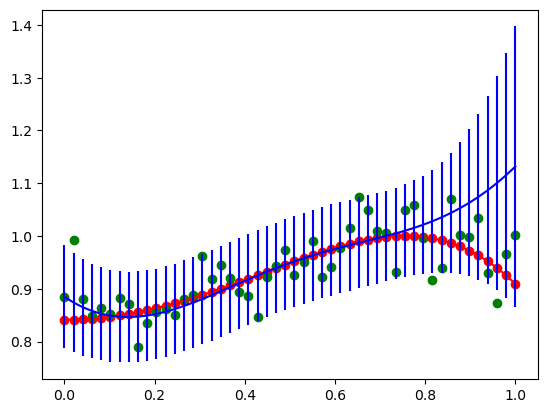

13 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9]


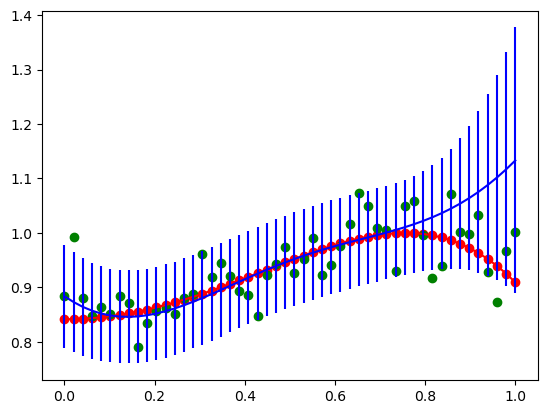

14 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32]


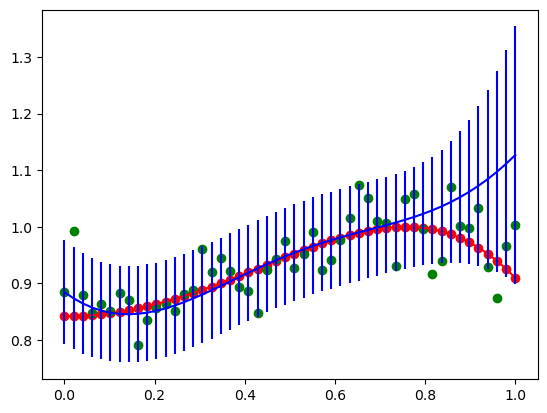

15 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18]


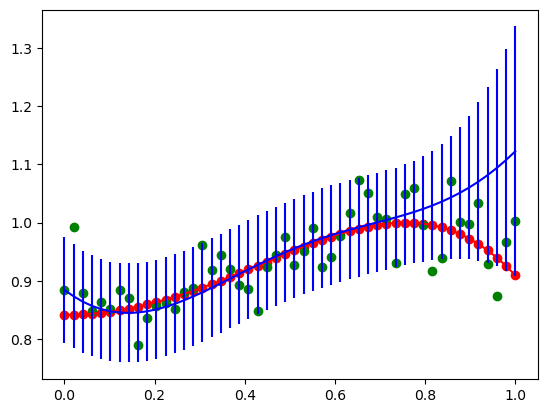

16 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27]


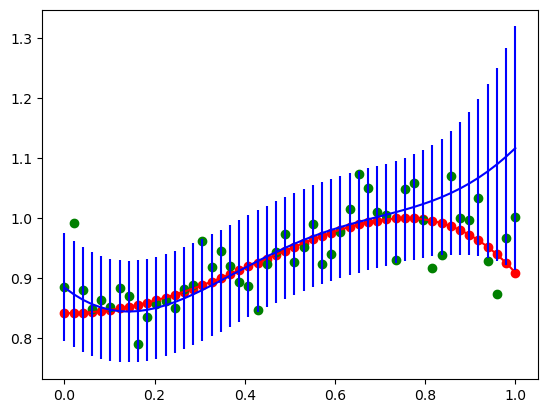

17 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41]


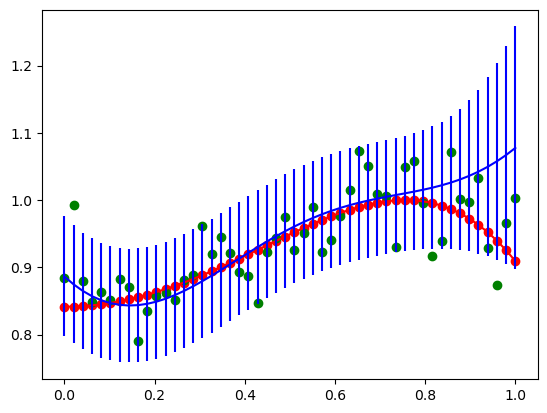

18 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2]


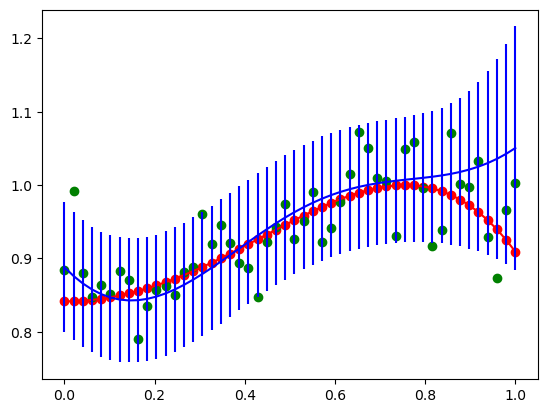

19 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16]


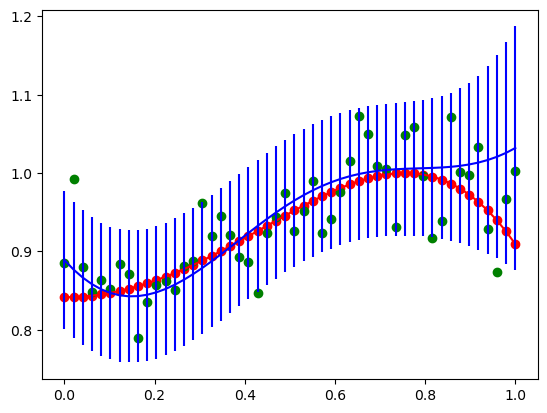

20 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21]


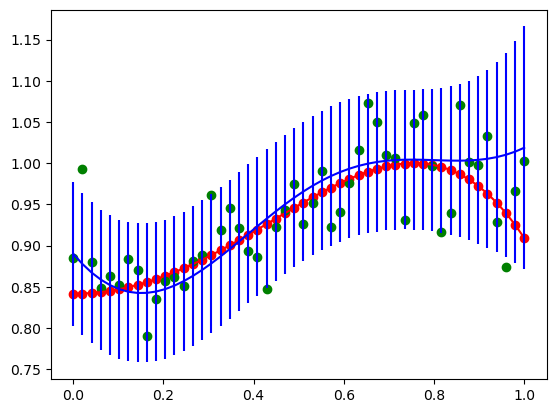

21 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17]


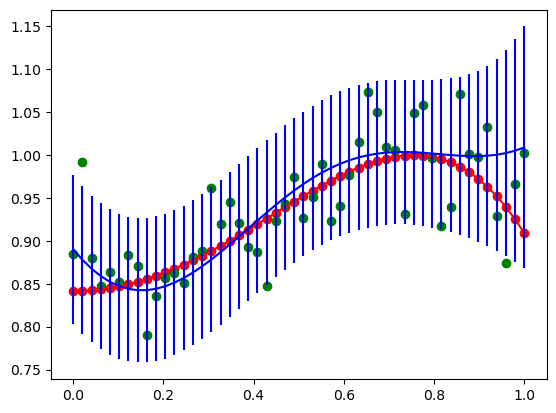

22 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49]


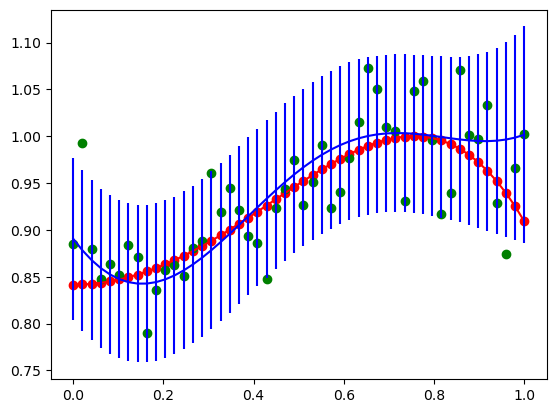

23 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44]


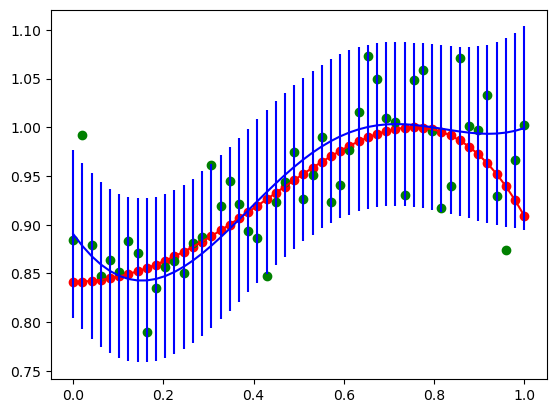

24 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13]


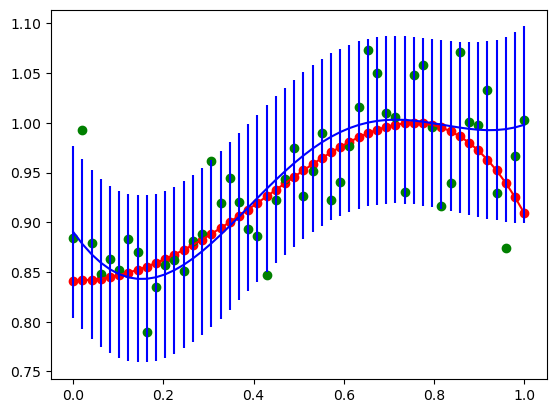

25 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26]


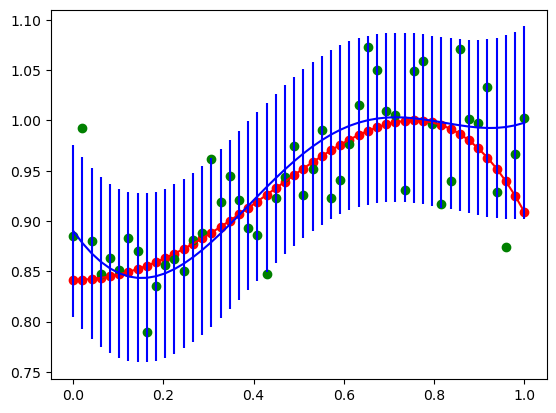

26 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6]


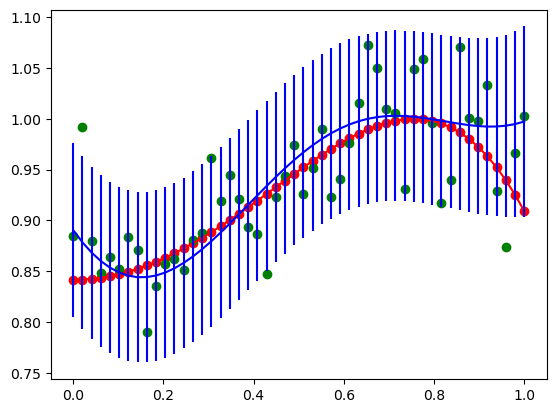

27 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47]


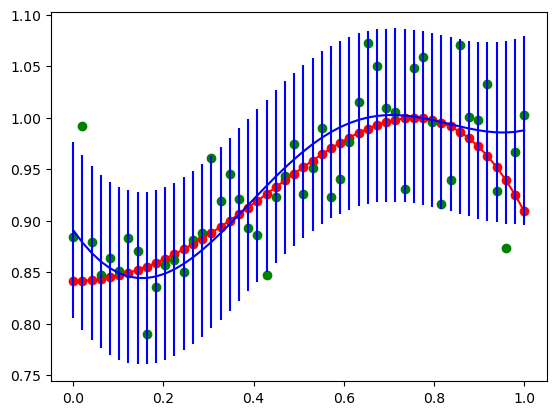

28 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28]


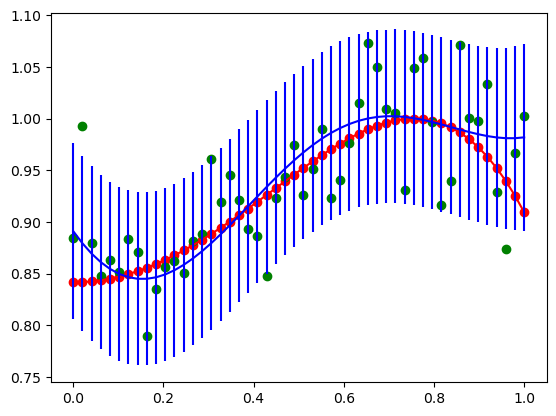

29 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7]


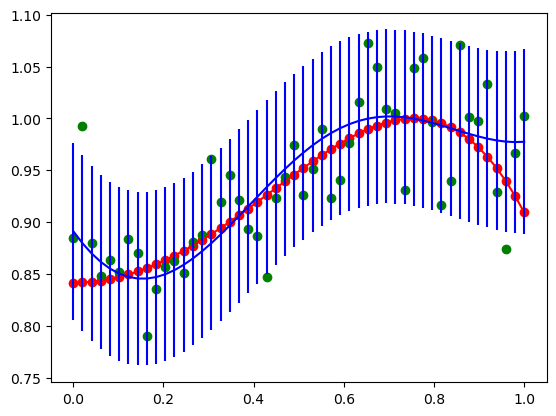

30 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31]


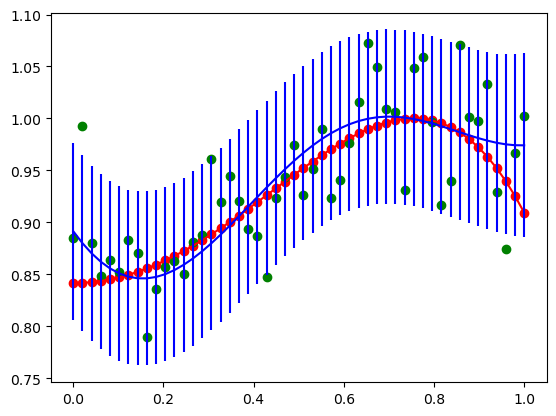

31 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1]


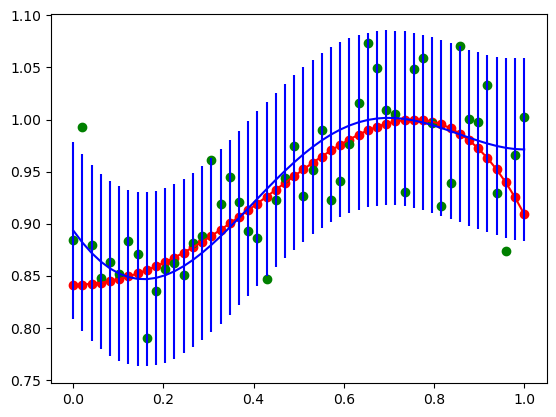

32 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15]


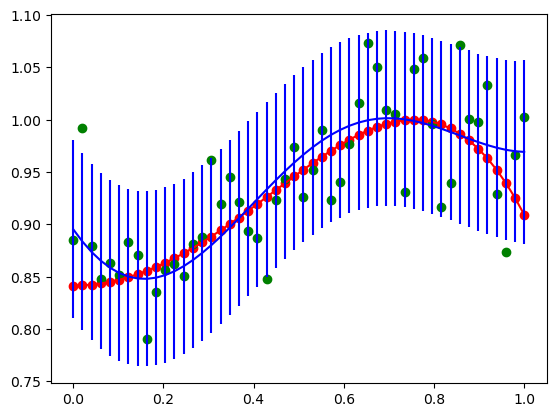

33 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37]


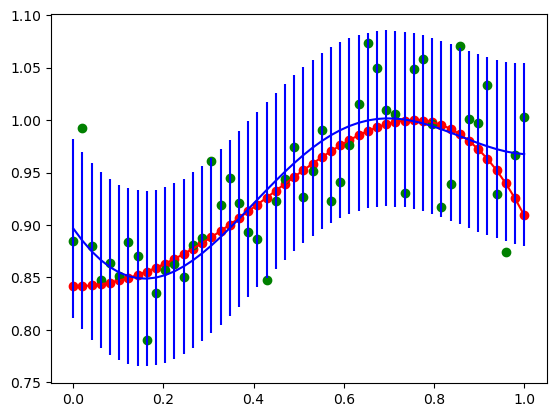

34 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4]


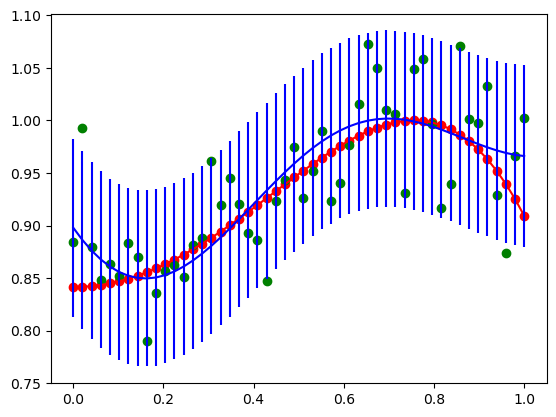

35 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8]


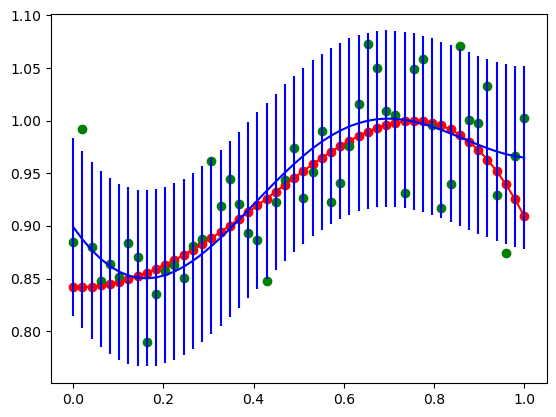

36 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39]


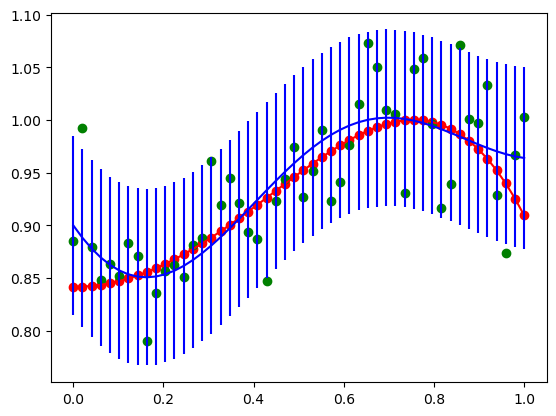

37 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23]


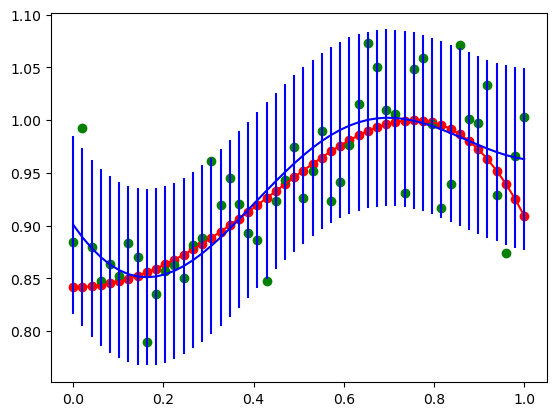

38 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45]


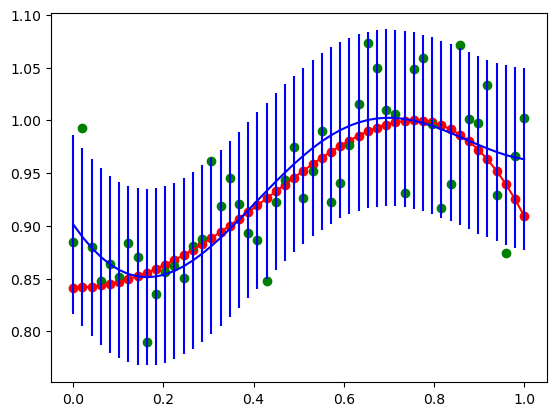

39 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43]


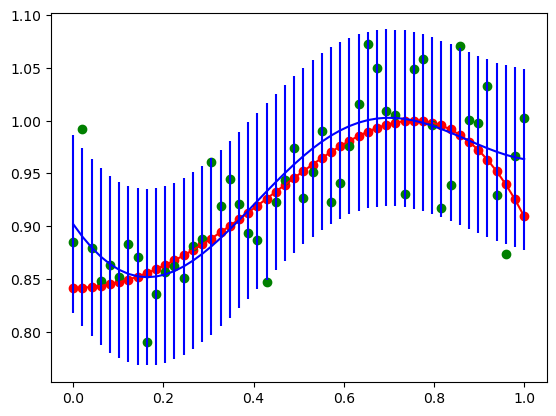

40 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35]


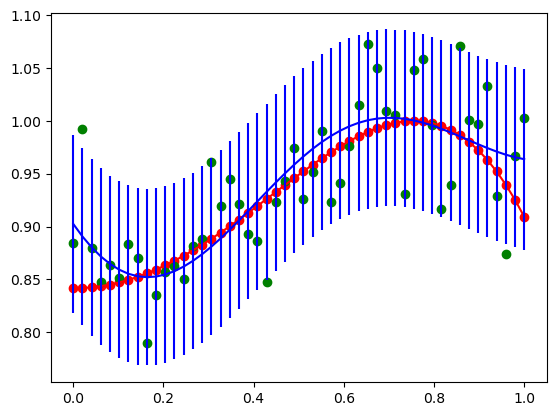

41 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42]


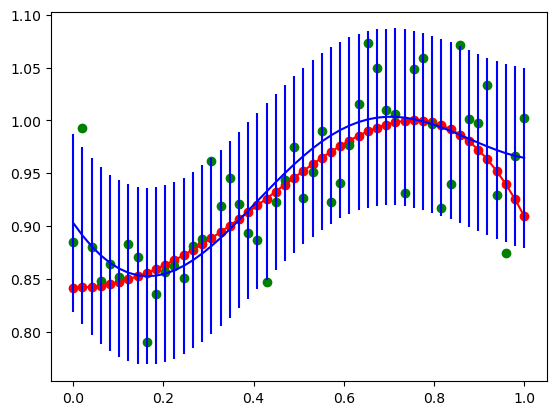

42 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19]


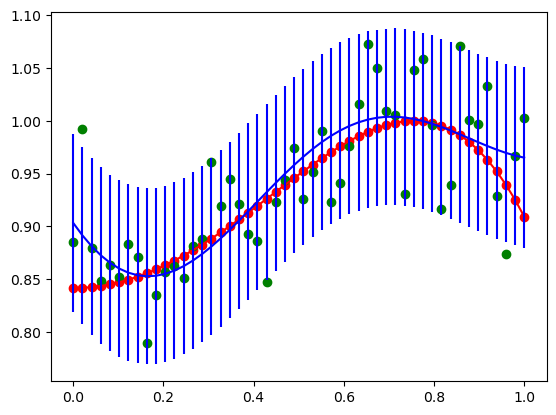

43 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40]


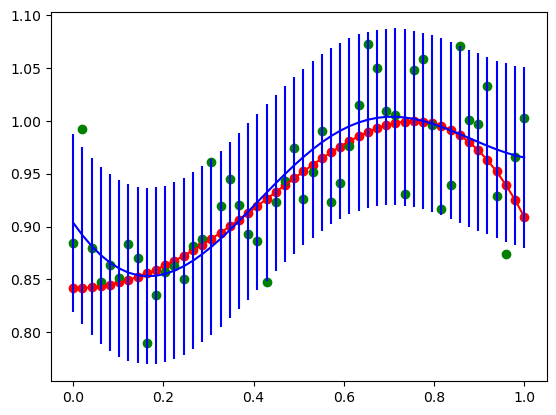

44 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29]


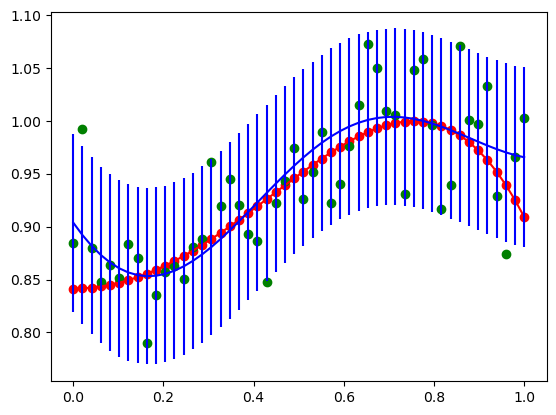

45 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29, 20]


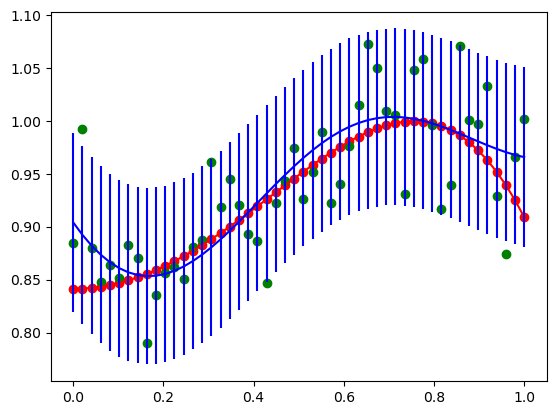

46 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29, 20, 10]


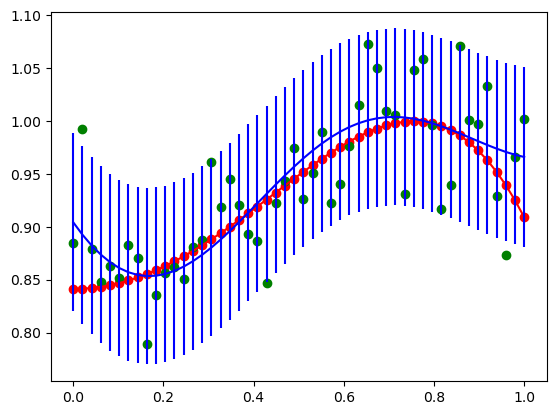

47 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29, 20, 10, 46]


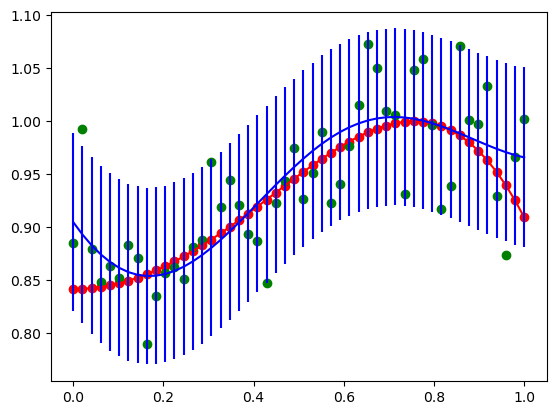

48 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29, 20, 10, 46, 34]


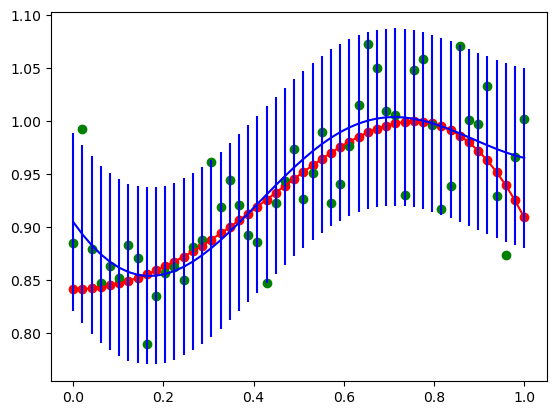

49 [22, 12, 5, 30, 36, 38, 14, 33, 24, 11, 0, 25, 3, 9, 32, 18, 27, 41, 2, 16, 21, 17, 49, 44, 13, 26, 6, 47, 28, 7, 31, 1, 15, 37, 4, 8, 39, 23, 45, 43, 35, 42, 19, 40, 29, 20, 10, 46, 34, 48]


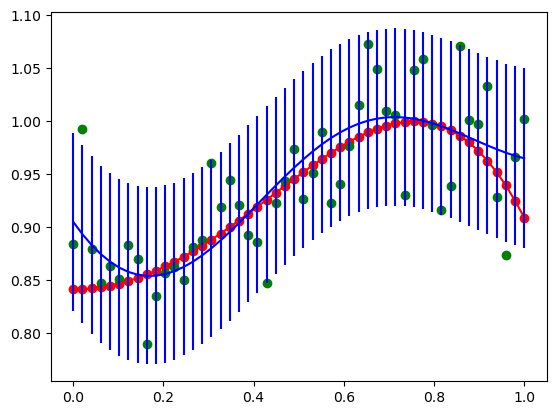

In [35]:
def gaussian(x, mean, sigma):

    gau = np.exp(-1*((x-mean)**2)/(2*(sigma**2)))

    return gau
# gd = gaussian(X,1,1)
# print(gd)

def sigmoid(x, mu, sigma):

    h = 1/(1+np.exp((x-mu)/sigma))
    return h

def getmean(X,m):

    mu = np.zeros((m))
    gap = (max(X)-min(X))/(m)

    for i in range(m):
        mu[i] = (i) * gap

    return mu

beta = 12
alpha = 1.5
M = 5
s = 0.5

def predictive_dist(data, m, a, n = N):

    phi_mat = np.zeros((n, m))
    data_iter = np.zeros((data.shape))
    # print(phimat.shape, X.shape)
    mu = getmean(X, m)
    
    for row in range(n):
        for col in range(m):
            if col == 0:
                phi_mat[row, col] = 1
            else:
                phi_mat[row, col] = gaussian(X[row], mu[col], s)

    index =[i for i in range(0,n)]
    x_index = []
    np.random.shuffle(index)

    x_shuffle = np.array([])
    data_shuffle = np.array([])

    S_cube = np.zeros((m, m, n))
    s_new = s_init = a
    weight_cube = np.zeros((m, 1, n))
    weight_new = weight_init = 0
    
    aver_star = np.zeros((n, n))
    var_star = np.zeros((n, n))

    for i in range (n):

        x_index.append(index[i])
        x_shuffle = np.append(x_shuffle, x[index[i]])
        data_shuffle = np.append(data_shuffle, yn[index[i]])

        lens = x_shuffle.shape[0]
        phi_iter = np.zeros((lens, m))
        data_iter = np.zeros((lens, 1))
        
        for col in range(m):
            for row in range(lens):
                if col == 0:
                    phi_iter[row, col] = 1
                else:
                    phi_iter[row, col] = gaussian(x_shuffle[row], mu[col], s)
                data_iter[row, 0] = data_shuffle[row]

        s_init = s_new
        s_new = s_init + beta* (phi_iter.T).dot(phi_iter) 
        S_cube[:, :, i] = np.linalg.pinv(s_new)

        weight_init = weight_new
        weight_new = S_cube[:, :, i].dot(np.dot(s_init, weight_init) + beta * (phi_iter.T).dot(data_iter))
        weight_cube[:, :, i] = weight_new
        # print(S_cube, weight_cube)

        aver = np.dot(phi_mat, weight_new)
        aver_star[:, i] = aver.ravel()
        # print(aver.shape)
        for row in range(n):
            var_star[row, i] = (1/beta) + np.dot(np.dot(phi_mat[row], S_cube[:, :, i]), phi_mat[row].T)
        # var_star = 1/beta* np.eye(n) + np.dot(np.dot(phi_mat, s_new), phi_mat.T)
    # print(aver_star, var_star)
    
    return x_index, aver_star, var_star
    
index, mean, std = predictive_dist(Yn, M, alpha)
# print(mean, std)
upper_bound = np.zeros((N, N))
lower_bound = np.zeros((N, N))

for row in range(mean.shape[0]):
    upper_bound[:, row] = (mean[:, row] + std[:, row])
    lower_bound[:, row] = (mean[:, row] - std[:, row])
# print(upper_bound, lower_bound)

for row in range(N):

    plt.figure(row)
    plt.plot(x, y, color='r')
    plt.scatter(x, y, c='red')
    plt.scatter(x, yn, c='green')
    plt.plot(x, mean[:, row], color='b')
    plt.vlines(x, upper_bound[:, row], lower_bound[:, row], linestyles="solid", colors="b")
    print(row, index[:(row+1)])
    plt.show()


8. Explain why the predictive distribution is better than the original form of the full Bayesian inference.

The predictive distribution illustrates the range of possible values of each predicted output with probability, it also shows the output with highest probability. While full bayesian only generates the predicted output with its highest value.

9. Discuss the differences between $p(t_{new}|t)$ and $p(w|t)$.

$p(t_{new}|t)$ shows the probability of $t_{new}$ given $t$, which makes us able to examime the correlation between $t_{new}$ and $t$. While $p(w|t)$ is the probability of $w$ given $t$. 